In [15]:
def adapt_obs(observation_env, entity):
    observation_norm = []
    for j in range(len(observation_env)):
        if entity.obs_norm[j].std != 0:
            observation_norm.append((observation_env[j]-entity.obs_norm[j].mean) / entity.obs_norm[j].std)    
        else:
            observation_norm.append(observation_env[j])

        entity.updated_obs_norm[j](observation_env[j])

    return observation_norm

def agent_env_loop(entity, generation):
    entity.survived = True
    entity.fitness = 0
    env.seed(10)
    observation_env = env.reset()  # s_0

    for i in range(MAX_SEQUENCE_LEN):

        if WELFORD:
            observation_norm = adapt_obs(observation_env, entity)   
        else:
            observation_norm = observation_env 
        
        action = entity.controller.feed_forward(observation_norm)  # a_t, s_t
        observation_env, reward, done, _ = env.step(action)        # s_{t+1}, r_{t+1}            

        entity.fitness += reward
        if done:
            break

C:\Users\Mars\Anaconda3\envs\gym\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
Dim. action space: (4,)
Dim. observation space: (24,)
--- Generation 0 ---
INFO:root:Time for diversity calculation: 45.53999900817871


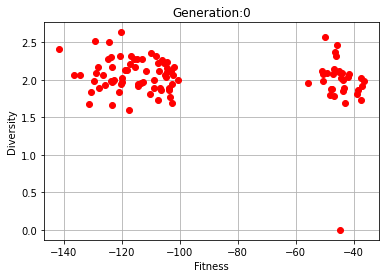

INFO:root:48 survived walker,max fitness: -36.55993244594265
Time: 56.23 sec
--- Generation 1 ---
INFO:root:47 survived walker,max fitness: -36.55993244594265
Time: 4.26 sec
--- Generation 2 ---
INFO:root:49 survived walker,max fitness: -26.523689300179928
Time: 5.27 sec
--- Generation 3 ---
INFO:root:48 survived walker,max fitness: -16.02824442827173
Time: 4.09 sec
--- Generation 4 ---
INFO:root:55 survived walker,max fitness: -16.02824442827173
Time: 5.62 sec
--- Generation 5 ---
INFO:root:49 survived walker,max fitness: -16.02824442827173
Time: 5.19 sec
--- Generation 6 ---
INFO:root:44 survived walker,max fitness: -16.02824442827173
Time: 4.71 sec
--- Generation 7 ---
INFO:root:56 survived walker,max fitness: -16.02824442827173
Time: 6.17 sec
--- Generation 8 ---
INFO:root:57 survived walker,max fitness: -16.02824442827173
Time: 3.50 sec
--- Generation 9 ---
INFO:root:52 survived walker,max fitness: -16.02824442827173
Time: 4.80 sec
--- Generation 10 ---
INFO:root:51 survived walke

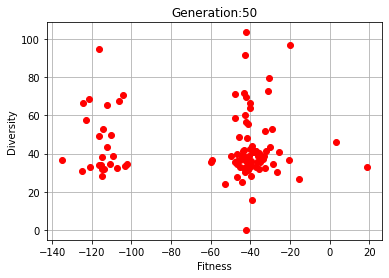

INFO:root:49 survived walker,max fitness: 18.689903957209154
Time: 87.64 sec
--- Generation 51 ---
INFO:root:49 survived walker,max fitness: 18.689903957209154
Time: 6.16 sec
--- Generation 52 ---
INFO:root:51 survived walker,max fitness: 18.689903957209154
Time: 6.79 sec
--- Generation 53 ---
INFO:root:55 survived walker,max fitness: 18.689903957209154
Time: 6.11 sec
--- Generation 54 ---
INFO:root:43 survived walker,max fitness: 18.689903957209154
Time: 6.26 sec
--- Generation 55 ---
INFO:root:55 survived walker,max fitness: 18.689903957209154
Time: 8.20 sec
--- Generation 56 ---
INFO:root:40 survived walker,max fitness: 18.689903957209154
Time: 6.12 sec
--- Generation 57 ---
INFO:root:52 survived walker,max fitness: 18.689903957209154
Time: 8.19 sec
--- Generation 58 ---
INFO:root:51 survived walker,max fitness: 18.689903957209154
Time: 8.12 sec
--- Generation 59 ---
INFO:root:48 survived walker,max fitness: 18.689903957209154
Time: 6.35 sec
--- Generation 60 ---
INFO:root:56 surviv

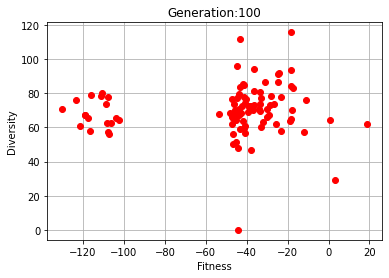

INFO:root:46 survived walker,max fitness: 18.689903957209154
Time: 103.97 sec
--- Generation 101 ---
INFO:root:50 survived walker,max fitness: 18.689903957209154
Time: 8.69 sec
--- Generation 102 ---
INFO:root:46 survived walker,max fitness: 18.689903957209154
Time: 7.68 sec
--- Generation 103 ---
INFO:root:50 survived walker,max fitness: 18.689903957209154
Time: 8.30 sec
--- Generation 104 ---
INFO:root:51 survived walker,max fitness: 18.689903957209154
Time: 8.78 sec
--- Generation 105 ---
INFO:root:49 survived walker,max fitness: 18.689903957209154
Time: 8.22 sec
--- Generation 106 ---
INFO:root:54 survived walker,max fitness: 18.689903957209154
Time: 8.65 sec
--- Generation 107 ---
INFO:root:51 survived walker,max fitness: 18.689903957209154
Time: 7.35 sec
--- Generation 108 ---
INFO:root:51 survived walker,max fitness: 18.689903957209154
Time: 6.46 sec
--- Generation 109 ---
INFO:root:44 survived walker,max fitness: 18.689903957209154
Time: 8.13 sec
--- Generation 110 ---
INFO:roo

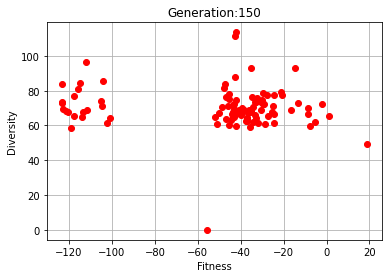

INFO:root:49 survived walker,max fitness: 18.689903957209154
Time: 107.25 sec
--- Generation 151 ---
INFO:root:45 survived walker,max fitness: 18.689903957209154
Time: 7.44 sec
--- Generation 152 ---
INFO:root:54 survived walker,max fitness: 18.689903957209154
Time: 6.66 sec
--- Generation 153 ---
INFO:root:46 survived walker,max fitness: 18.689903957209154
Time: 5.59 sec
--- Generation 154 ---
INFO:root:46 survived walker,max fitness: 18.689903957209154
Time: 6.52 sec
--- Generation 155 ---
INFO:root:50 survived walker,max fitness: 18.689903957209154
Time: 7.84 sec
--- Generation 156 ---
INFO:root:49 survived walker,max fitness: 18.689903957209154
Time: 6.04 sec
--- Generation 157 ---
INFO:root:54 survived walker,max fitness: 18.689903957209154
Time: 6.28 sec
--- Generation 158 ---
INFO:root:45 survived walker,max fitness: 18.689903957209154
Time: 6.78 sec
--- Generation 159 ---
INFO:root:48 survived walker,max fitness: 18.689903957209154
Time: 7.03 sec
--- Generation 160 ---
INFO:roo

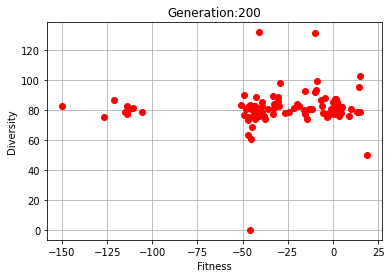

INFO:root:56 survived walker,max fitness: 18.689903957209154
Time: 108.32 sec
--- Generation 201 ---
INFO:root:47 survived walker,max fitness: 18.689903957209154
Time: 7.59 sec
--- Generation 202 ---
INFO:root:48 survived walker,max fitness: 18.689903957209154
Time: 8.34 sec
--- Generation 203 ---
INFO:root:50 survived walker,max fitness: 18.689903957209154
Time: 7.78 sec
--- Generation 204 ---
INFO:root:50 survived walker,max fitness: 18.689903957209154
Time: 7.46 sec
--- Generation 205 ---
INFO:root:55 survived walker,max fitness: 18.689903957209154
Time: 7.20 sec
--- Generation 206 ---
INFO:root:48 survived walker,max fitness: 18.689903957209154
Time: 6.64 sec
--- Generation 207 ---
INFO:root:53 survived walker,max fitness: 18.689903957209154
Time: 8.00 sec
--- Generation 208 ---
INFO:root:51 survived walker,max fitness: 18.689903957209154
Time: 7.23 sec
--- Generation 209 ---
INFO:root:52 survived walker,max fitness: 18.689903957209154
Time: 6.55 sec
--- Generation 210 ---
INFO:roo

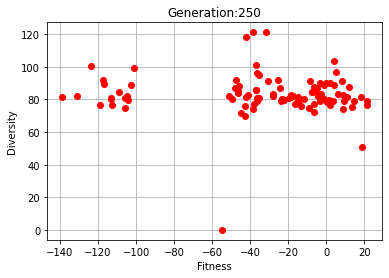

INFO:root:41 survived walker,max fitness: 21.212838803715197
Time: 113.06 sec
--- Generation 251 ---
INFO:root:50 survived walker,max fitness: 21.212838803715197
Time: 8.34 sec
--- Generation 252 ---
INFO:root:51 survived walker,max fitness: 21.212838803715197
Time: 6.47 sec
--- Generation 253 ---
INFO:root:52 survived walker,max fitness: 21.212838803715197
Time: 7.29 sec
--- Generation 254 ---
INFO:root:48 survived walker,max fitness: 21.212838803715197
Time: 7.42 sec
--- Generation 255 ---
INFO:root:52 survived walker,max fitness: 21.212838803715197
Time: 6.95 sec
--- Generation 256 ---
INFO:root:46 survived walker,max fitness: 21.212838803715197
Time: 6.75 sec
--- Generation 257 ---
INFO:root:51 survived walker,max fitness: 21.212838803715197
Time: 8.00 sec
--- Generation 258 ---
INFO:root:56 survived walker,max fitness: 25.736065819453415
Time: 6.83 sec
--- Generation 259 ---
INFO:root:57 survived walker,max fitness: 25.736065819453415
Time: 6.39 sec
--- Generation 260 ---
INFO:roo

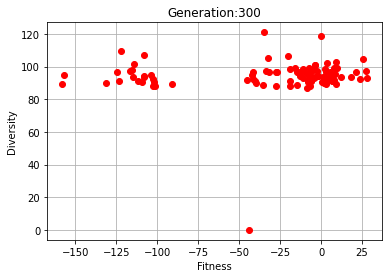

INFO:root:54 survived walker,max fitness: 27.913155297108066
Time: 112.73 sec
--- Generation 301 ---
INFO:root:56 survived walker,max fitness: 27.913155297108066
Time: 7.13 sec
--- Generation 302 ---
INFO:root:52 survived walker,max fitness: 27.913155297108066
Time: 6.65 sec
--- Generation 303 ---
INFO:root:49 survived walker,max fitness: 27.913155297108066
Time: 6.89 sec
--- Generation 304 ---
INFO:root:49 survived walker,max fitness: 27.913155297108066
Time: 8.10 sec
--- Generation 305 ---
INFO:root:52 survived walker,max fitness: 27.913155297108066
Time: 8.61 sec
--- Generation 306 ---
INFO:root:46 survived walker,max fitness: 27.913155297108066
Time: 7.73 sec
--- Generation 307 ---
INFO:root:53 survived walker,max fitness: 27.913155297108066
Time: 8.65 sec
--- Generation 308 ---
INFO:root:47 survived walker,max fitness: 27.913155297108066
Time: 7.37 sec
--- Generation 309 ---
INFO:root:48 survived walker,max fitness: 27.913155297108066
Time: 8.89 sec
--- Generation 310 ---
INFO:roo

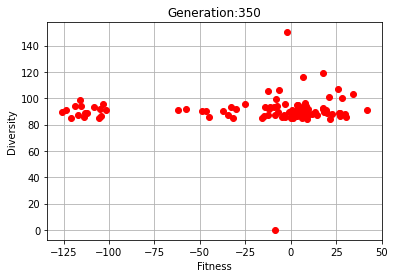

INFO:root:57 survived walker,max fitness: 41.80949651018191
Time: 110.93 sec
--- Generation 351 ---
INFO:root:44 survived walker,max fitness: 41.80949651018191
Time: 6.69 sec
--- Generation 352 ---
INFO:root:54 survived walker,max fitness: 41.80949651018191
Time: 6.54 sec
--- Generation 353 ---
INFO:root:55 survived walker,max fitness: 41.80949651018191
Time: 5.65 sec
--- Generation 354 ---
INFO:root:45 survived walker,max fitness: 41.80949651018191
Time: 6.28 sec
--- Generation 355 ---
INFO:root:51 survived walker,max fitness: 41.80949651018191
Time: 8.22 sec
--- Generation 356 ---
INFO:root:51 survived walker,max fitness: 41.80949651018191
Time: 6.41 sec
--- Generation 357 ---
INFO:root:48 survived walker,max fitness: 41.80949651018191
Time: 7.14 sec
--- Generation 358 ---
INFO:root:60 survived walker,max fitness: 41.80949651018191
Time: 6.78 sec
--- Generation 359 ---
INFO:root:53 survived walker,max fitness: 41.80949651018191
Time: 5.68 sec
--- Generation 360 ---
INFO:root:46 survi

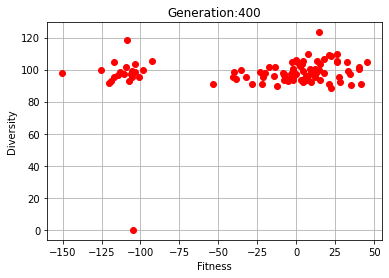

INFO:root:49 survived walker,max fitness: 45.34518261074761
Time: 109.25 sec
--- Generation 401 ---
INFO:root:43 survived walker,max fitness: 45.34518261074761
Time: 7.58 sec
--- Generation 402 ---
INFO:root:55 survived walker,max fitness: 45.34518261074761
Time: 8.62 sec
--- Generation 403 ---
INFO:root:55 survived walker,max fitness: 45.34518261074761
Time: 5.97 sec
--- Generation 404 ---
INFO:root:48 survived walker,max fitness: 45.34518261074761
Time: 6.28 sec
--- Generation 405 ---
INFO:root:48 survived walker,max fitness: 45.34518261074761
Time: 6.73 sec
--- Generation 406 ---
INFO:root:53 survived walker,max fitness: 45.34518261074761
Time: 6.48 sec
--- Generation 407 ---
INFO:root:49 survived walker,max fitness: 45.34518261074761
Time: 5.49 sec
--- Generation 408 ---
INFO:root:57 survived walker,max fitness: 45.34518261074761
Time: 6.04 sec
--- Generation 409 ---
INFO:root:51 survived walker,max fitness: 45.34518261074761
Time: 5.15 sec
--- Generation 410 ---
INFO:root:52 survi

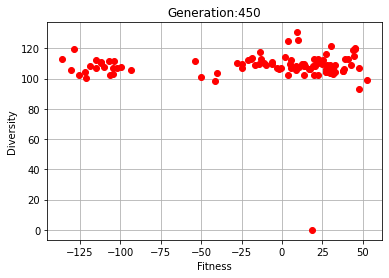

INFO:root:44 survived walker,max fitness: 52.457359545874475
Time: 108.33 sec
--- Generation 451 ---
INFO:root:53 survived walker,max fitness: 52.457359545874475
Time: 8.87 sec
--- Generation 452 ---
INFO:root:42 survived walker,max fitness: 52.457359545874475
Time: 5.24 sec
--- Generation 453 ---
INFO:root:53 survived walker,max fitness: 52.457359545874475
Time: 8.89 sec
--- Generation 454 ---
INFO:root:52 survived walker,max fitness: 52.457359545874475
Time: 6.98 sec
--- Generation 455 ---
INFO:root:54 survived walker,max fitness: 52.457359545874475
Time: 6.93 sec
--- Generation 456 ---
INFO:root:52 survived walker,max fitness: 52.457359545874475
Time: 5.95 sec
--- Generation 457 ---
INFO:root:43 survived walker,max fitness: 52.457359545874475
Time: 5.51 sec
--- Generation 458 ---
INFO:root:43 survived walker,max fitness: 52.457359545874475
Time: 8.49 sec
--- Generation 459 ---
INFO:root:48 survived walker,max fitness: 52.457359545874475
Time: 7.69 sec
--- Generation 460 ---
INFO:roo

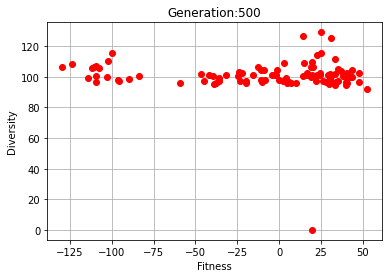

INFO:root:47 survived walker,max fitness: 52.457359545874475
Time: 113.05 sec
--- Generation 501 ---
INFO:root:52 survived walker,max fitness: 53.184809313244834
Time: 7.10 sec
--- Generation 502 ---
INFO:root:46 survived walker,max fitness: 53.184809313244834
Time: 6.88 sec
--- Generation 503 ---
INFO:root:49 survived walker,max fitness: 53.184809313244834
Time: 7.39 sec
--- Generation 504 ---
INFO:root:41 survived walker,max fitness: 53.184809313244834
Time: 6.93 sec
--- Generation 505 ---
INFO:root:52 survived walker,max fitness: 53.184809313244834
Time: 7.33 sec
--- Generation 506 ---
INFO:root:46 survived walker,max fitness: 53.184809313244834
Time: 5.76 sec
--- Generation 507 ---
INFO:root:53 survived walker,max fitness: 53.184809313244834
Time: 7.27 sec
--- Generation 508 ---
INFO:root:52 survived walker,max fitness: 53.184809313244834
Time: 7.00 sec
--- Generation 509 ---
INFO:root:53 survived walker,max fitness: 53.184809313244834
Time: 5.39 sec
--- Generation 510 ---
INFO:roo

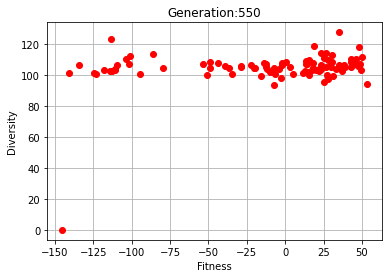

INFO:root:53 survived walker,max fitness: 53.184809313244834
Time: 114.61 sec
--- Generation 551 ---
INFO:root:46 survived walker,max fitness: 53.184809313244834
Time: 6.71 sec
--- Generation 552 ---
INFO:root:48 survived walker,max fitness: 53.184809313244834
Time: 8.79 sec
--- Generation 553 ---
INFO:root:45 survived walker,max fitness: 53.184809313244834
Time: 9.99 sec
--- Generation 554 ---
INFO:root:47 survived walker,max fitness: 53.184809313244834
Time: 8.49 sec
--- Generation 555 ---
INFO:root:51 survived walker,max fitness: 53.184809313244834
Time: 8.17 sec
--- Generation 556 ---
INFO:root:51 survived walker,max fitness: 53.184809313244834
Time: 7.02 sec
--- Generation 557 ---
INFO:root:56 survived walker,max fitness: 53.184809313244834
Time: 6.69 sec
--- Generation 558 ---
INFO:root:49 survived walker,max fitness: 53.184809313244834
Time: 5.48 sec
--- Generation 559 ---
INFO:root:51 survived walker,max fitness: 53.184809313244834
Time: 7.26 sec
--- Generation 560 ---
INFO:roo

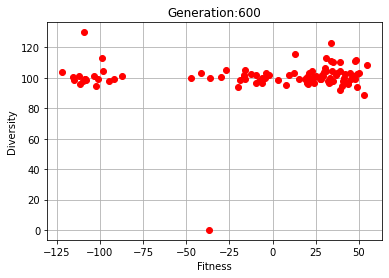

INFO:root:53 survived walker,max fitness: 54.59475607151573
Time: 117.53 sec
--- Generation 601 ---
INFO:root:52 survived walker,max fitness: 54.59475607151573
Time: 6.72 sec
--- Generation 602 ---
INFO:root:45 survived walker,max fitness: 54.59475607151573
Time: 7.59 sec
--- Generation 603 ---
INFO:root:51 survived walker,max fitness: 54.59475607151573
Time: 8.11 sec
--- Generation 604 ---
INFO:root:53 survived walker,max fitness: 54.59475607151573
Time: 7.95 sec
--- Generation 605 ---
INFO:root:48 survived walker,max fitness: 54.59475607151573
Time: 6.44 sec
--- Generation 606 ---
INFO:root:53 survived walker,max fitness: 54.59475607151573
Time: 6.89 sec
--- Generation 607 ---
INFO:root:49 survived walker,max fitness: 54.59475607151573
Time: 6.06 sec
--- Generation 608 ---
INFO:root:50 survived walker,max fitness: 54.59475607151573
Time: 5.69 sec
--- Generation 609 ---
INFO:root:48 survived walker,max fitness: 54.59475607151573
Time: 6.29 sec
--- Generation 610 ---
INFO:root:52 survi

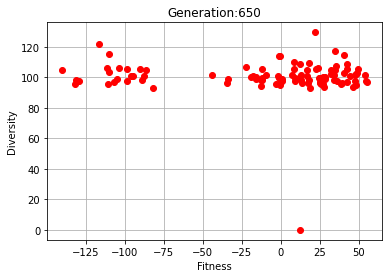

INFO:root:51 survived walker,max fitness: 55.29854770395812
Time: 113.25 sec
--- Generation 651 ---
INFO:root:52 survived walker,max fitness: 55.29854770395812
Time: 7.01 sec
--- Generation 652 ---
INFO:root:45 survived walker,max fitness: 55.29854770395812
Time: 7.14 sec
--- Generation 653 ---
INFO:root:52 survived walker,max fitness: 55.29854770395812
Time: 5.56 sec
--- Generation 654 ---
INFO:root:52 survived walker,max fitness: 55.29854770395812
Time: 6.51 sec
--- Generation 655 ---
INFO:root:50 survived walker,max fitness: 55.29854770395812
Time: 6.04 sec
--- Generation 656 ---
INFO:root:51 survived walker,max fitness: 55.29854770395812
Time: 7.78 sec
--- Generation 657 ---
INFO:root:52 survived walker,max fitness: 55.29854770395812
Time: 7.86 sec
--- Generation 658 ---
INFO:root:46 survived walker,max fitness: 55.29854770395812
Time: 7.23 sec
--- Generation 659 ---
INFO:root:54 survived walker,max fitness: 55.29854770395812
Time: 8.61 sec
--- Generation 660 ---
INFO:root:41 survi

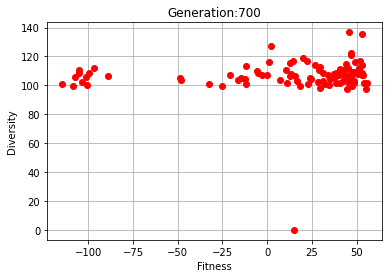

INFO:root:54 survived walker,max fitness: 55.66838398697885
Time: 115.03 sec
--- Generation 701 ---
INFO:root:51 survived walker,max fitness: 55.66838398697885
Time: 6.14 sec
--- Generation 702 ---
INFO:root:47 survived walker,max fitness: 55.66838398697885
Time: 6.45 sec
--- Generation 703 ---
INFO:root:45 survived walker,max fitness: 55.66838398697885
Time: 8.02 sec
--- Generation 704 ---
INFO:root:47 survived walker,max fitness: 55.66838398697885
Time: 7.36 sec
--- Generation 705 ---
INFO:root:53 survived walker,max fitness: 55.66838398697885
Time: 6.32 sec
--- Generation 706 ---
INFO:root:45 survived walker,max fitness: 55.66838398697885
Time: 7.04 sec
--- Generation 707 ---
INFO:root:53 survived walker,max fitness: 55.66838398697885
Time: 8.03 sec
--- Generation 708 ---
INFO:root:46 survived walker,max fitness: 55.66838398697885
Time: 5.84 sec
--- Generation 709 ---
INFO:root:48 survived walker,max fitness: 55.66838398697885
Time: 8.37 sec
--- Generation 710 ---
INFO:root:52 survi

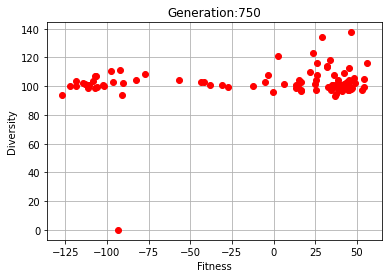

INFO:root:52 survived walker,max fitness: 55.93360104790486
Time: 116.05 sec
--- Generation 751 ---
INFO:root:49 survived walker,max fitness: 55.93360104790486
Time: 6.51 sec
--- Generation 752 ---
INFO:root:45 survived walker,max fitness: 55.93360104790486
Time: 8.48 sec
--- Generation 753 ---
INFO:root:51 survived walker,max fitness: 55.93360104790486
Time: 7.30 sec
--- Generation 754 ---
INFO:root:50 survived walker,max fitness: 55.93360104790486
Time: 7.64 sec
--- Generation 755 ---
INFO:root:52 survived walker,max fitness: 55.93360104790486
Time: 7.40 sec
--- Generation 756 ---
INFO:root:42 survived walker,max fitness: 55.93360104790486
Time: 7.49 sec
--- Generation 757 ---
INFO:root:53 survived walker,max fitness: 55.93360104790486
Time: 9.19 sec
--- Generation 758 ---
INFO:root:51 survived walker,max fitness: 55.93360104790486
Time: 6.94 sec
--- Generation 759 ---
INFO:root:48 survived walker,max fitness: 55.93360104790486
Time: 7.50 sec
--- Generation 760 ---
INFO:root:51 survi

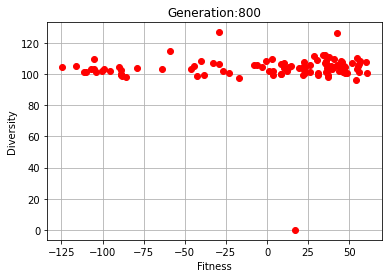

INFO:root:45 survived walker,max fitness: 60.677433708827486
Time: 116.98 sec
--- Generation 801 ---
INFO:root:50 survived walker,max fitness: 60.677433708827486
Time: 7.96 sec
--- Generation 802 ---
INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 6.91 sec
--- Generation 803 ---
INFO:root:44 survived walker,max fitness: 60.677433708827486
Time: 7.26 sec
--- Generation 804 ---
INFO:root:47 survived walker,max fitness: 60.677433708827486
Time: 8.03 sec
--- Generation 805 ---
INFO:root:57 survived walker,max fitness: 60.677433708827486
Time: 8.88 sec
--- Generation 806 ---
INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 6.29 sec
--- Generation 807 ---
INFO:root:52 survived walker,max fitness: 60.677433708827486
Time: 7.53 sec
--- Generation 808 ---
INFO:root:50 survived walker,max fitness: 60.677433708827486
Time: 6.86 sec
--- Generation 809 ---
INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 7.89 sec
--- Generation 810 ---
INFO:roo

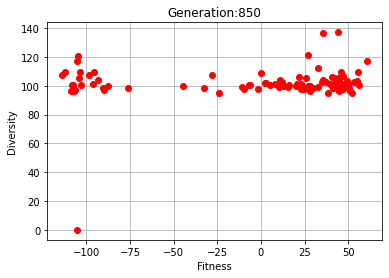

INFO:root:44 survived walker,max fitness: 60.677433708827486
Time: 119.93 sec
--- Generation 851 ---
INFO:root:53 survived walker,max fitness: 60.677433708827486
Time: 8.62 sec
--- Generation 852 ---
INFO:root:55 survived walker,max fitness: 60.677433708827486
Time: 7.46 sec
--- Generation 853 ---
INFO:root:52 survived walker,max fitness: 60.677433708827486
Time: 6.73 sec
--- Generation 854 ---
INFO:root:50 survived walker,max fitness: 60.677433708827486
Time: 7.26 sec
--- Generation 855 ---
INFO:root:52 survived walker,max fitness: 60.677433708827486
Time: 7.40 sec
--- Generation 856 ---
INFO:root:49 survived walker,max fitness: 60.677433708827486
Time: 7.52 sec
--- Generation 857 ---
INFO:root:58 survived walker,max fitness: 60.677433708827486
Time: 8.52 sec
--- Generation 858 ---
INFO:root:49 survived walker,max fitness: 60.677433708827486
Time: 6.20 sec
--- Generation 859 ---
INFO:root:48 survived walker,max fitness: 60.677433708827486
Time: 7.35 sec
--- Generation 860 ---
INFO:roo

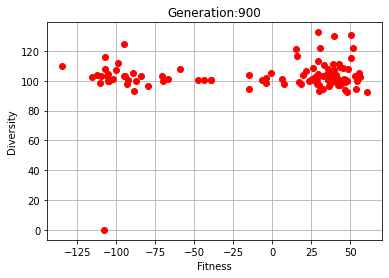

INFO:root:41 survived walker,max fitness: 60.677433708827486
Time: 118.43 sec
--- Generation 901 ---
INFO:root:58 survived walker,max fitness: 60.677433708827486
Time: 8.61 sec
--- Generation 902 ---
INFO:root:54 survived walker,max fitness: 60.677433708827486
Time: 5.85 sec
--- Generation 903 ---
INFO:root:55 survived walker,max fitness: 60.677433708827486
Time: 5.87 sec
--- Generation 904 ---
INFO:root:45 survived walker,max fitness: 60.677433708827486
Time: 6.51 sec
--- Generation 905 ---
INFO:root:50 survived walker,max fitness: 60.677433708827486
Time: 8.03 sec
--- Generation 906 ---
INFO:root:48 survived walker,max fitness: 60.677433708827486
Time: 7.76 sec
--- Generation 907 ---
INFO:root:43 survived walker,max fitness: 60.677433708827486
Time: 8.40 sec
--- Generation 908 ---
INFO:root:55 survived walker,max fitness: 60.677433708827486
Time: 8.20 sec
--- Generation 909 ---
INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 8.14 sec
--- Generation 910 ---
INFO:roo

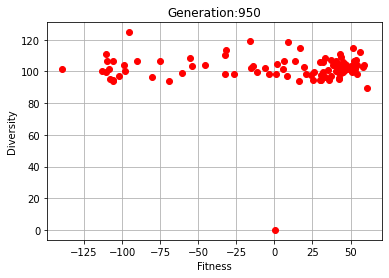

INFO:root:52 survived walker,max fitness: 60.677433708827486
Time: 117.80 sec
--- Generation 951 ---
INFO:root:58 survived walker,max fitness: 60.677433708827486
Time: 7.85 sec
--- Generation 952 ---
INFO:root:52 survived walker,max fitness: 60.677433708827486
Time: 5.70 sec
--- Generation 953 ---
INFO:root:54 survived walker,max fitness: 60.677433708827486
Time: 6.85 sec
--- Generation 954 ---
INFO:root:52 survived walker,max fitness: 60.677433708827486
Time: 6.22 sec
--- Generation 955 ---
INFO:root:54 survived walker,max fitness: 60.677433708827486
Time: 7.10 sec
--- Generation 956 ---
INFO:root:42 survived walker,max fitness: 60.677433708827486
Time: 6.85 sec
--- Generation 957 ---
INFO:root:43 survived walker,max fitness: 60.677433708827486
Time: 8.57 sec
--- Generation 958 ---
INFO:root:46 survived walker,max fitness: 60.677433708827486
Time: 8.59 sec
--- Generation 959 ---
INFO:root:56 survived walker,max fitness: 60.677433708827486
Time: 8.09 sec
--- Generation 960 ---
INFO:roo

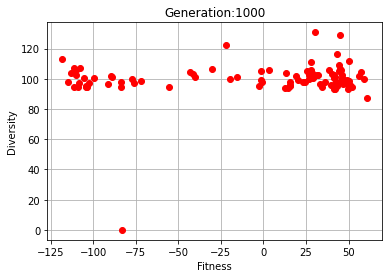

INFO:root:53 survived walker,max fitness: 60.677433708827486
Time: 117.98 sec
--- Generation 1001 ---
INFO:root:55 survived walker,max fitness: 60.677433708827486
Time: 7.16 sec
--- Generation 1002 ---
INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 7.25 sec
--- Generation 1003 ---
INFO:root:46 survived walker,max fitness: 60.677433708827486
Time: 6.44 sec
--- Generation 1004 ---
INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 8.58 sec
--- Generation 1005 ---
INFO:root:44 survived walker,max fitness: 60.677433708827486
Time: 7.92 sec
--- Generation 1006 ---
INFO:root:46 survived walker,max fitness: 60.677433708827486
Time: 8.00 sec
--- Generation 1007 ---
INFO:root:50 survived walker,max fitness: 60.677433708827486
Time: 7.57 sec
--- Generation 1008 ---
INFO:root:47 survived walker,max fitness: 60.677433708827486
Time: 8.08 sec
--- Generation 1009 ---
INFO:root:55 survived walker,max fitness: 60.677433708827486
Time: 8.99 sec
--- Generation 1010 --

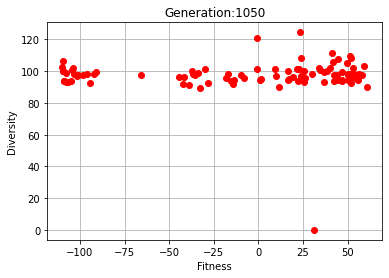

INFO:root:50 survived walker,max fitness: 60.677433708827486
Time: 118.78 sec
--- Generation 1051 ---
INFO:root:45 survived walker,max fitness: 60.677433708827486
Time: 7.36 sec
--- Generation 1052 ---
INFO:root:47 survived walker,max fitness: 60.677433708827486
Time: 8.48 sec
--- Generation 1053 ---
INFO:root:55 survived walker,max fitness: 60.677433708827486
Time: 7.61 sec
--- Generation 1054 ---
INFO:root:52 survived walker,max fitness: 60.677433708827486
Time: 7.04 sec
--- Generation 1055 ---
INFO:root:44 survived walker,max fitness: 60.677433708827486
Time: 7.09 sec
--- Generation 1056 ---
INFO:root:43 survived walker,max fitness: 60.677433708827486
Time: 8.11 sec
--- Generation 1057 ---
INFO:root:50 survived walker,max fitness: 60.677433708827486
Time: 8.24 sec
--- Generation 1058 ---
INFO:root:46 survived walker,max fitness: 60.677433708827486
Time: 8.08 sec
--- Generation 1059 ---
INFO:root:55 survived walker,max fitness: 60.677433708827486
Time: 7.96 sec
--- Generation 1060 --

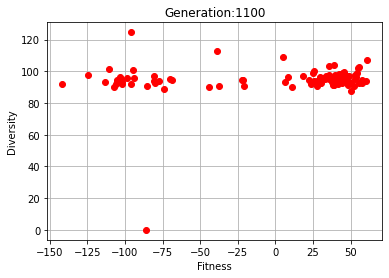

INFO:root:47 survived walker,max fitness: 60.677433708827486
Time: 118.71 sec
--- Generation 1101 ---
INFO:root:52 survived walker,max fitness: 60.677433708827486
Time: 7.87 sec
--- Generation 1102 ---
INFO:root:53 survived walker,max fitness: 60.677433708827486
Time: 6.76 sec
--- Generation 1103 ---
INFO:root:50 survived walker,max fitness: 60.677433708827486
Time: 7.23 sec
--- Generation 1104 ---
INFO:root:58 survived walker,max fitness: 60.677433708827486
Time: 7.13 sec
--- Generation 1105 ---
INFO:root:47 survived walker,max fitness: 60.677433708827486
Time: 6.58 sec
--- Generation 1106 ---
INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 7.68 sec
--- Generation 1107 ---
INFO:root:53 survived walker,max fitness: 60.677433708827486
Time: 8.10 sec
--- Generation 1108 ---
INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 7.86 sec
--- Generation 1109 ---
INFO:root:49 survived walker,max fitness: 60.677433708827486
Time: 8.27 sec
--- Generation 1110 --

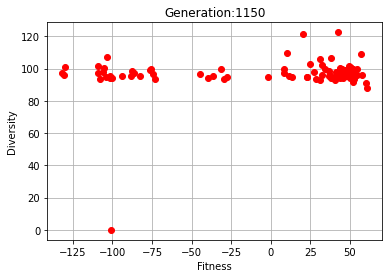

INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 117.69 sec
--- Generation 1151 ---
INFO:root:50 survived walker,max fitness: 60.677433708827486
Time: 8.07 sec
--- Generation 1152 ---
INFO:root:48 survived walker,max fitness: 60.677433708827486
Time: 8.17 sec
--- Generation 1153 ---
INFO:root:57 survived walker,max fitness: 60.677433708827486
Time: 8.31 sec
--- Generation 1154 ---
INFO:root:56 survived walker,max fitness: 60.677433708827486
Time: 6.96 sec
--- Generation 1155 ---
INFO:root:50 survived walker,max fitness: 60.677433708827486
Time: 7.07 sec
--- Generation 1156 ---
INFO:root:54 survived walker,max fitness: 60.677433708827486
Time: 8.04 sec
--- Generation 1157 ---
INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 7.01 sec
--- Generation 1158 ---
INFO:root:52 survived walker,max fitness: 60.677433708827486
Time: 7.85 sec
--- Generation 1159 ---
INFO:root:53 survived walker,max fitness: 60.677433708827486
Time: 8.15 sec
--- Generation 1160 --

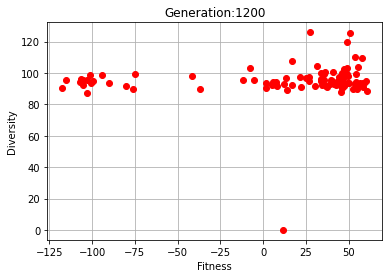

INFO:root:53 survived walker,max fitness: 60.677433708827486
Time: 121.09 sec
--- Generation 1201 ---
INFO:root:52 survived walker,max fitness: 60.677433708827486
Time: 6.73 sec
--- Generation 1202 ---
INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 7.54 sec
--- Generation 1203 ---
INFO:root:58 survived walker,max fitness: 60.677433708827486
Time: 7.92 sec
--- Generation 1204 ---
INFO:root:51 survived walker,max fitness: 60.677433708827486
Time: 7.23 sec
--- Generation 1205 ---
INFO:root:46 survived walker,max fitness: 60.677433708827486
Time: 7.65 sec
--- Generation 1206 ---
INFO:root:53 survived walker,max fitness: 60.677433708827486
Time: 8.57 sec
--- Generation 1207 ---
INFO:root:52 survived walker,max fitness: 60.677433708827486
Time: 6.94 sec
--- Generation 1208 ---
INFO:root:56 survived walker,max fitness: 60.677433708827486
Time: 7.74 sec
--- Generation 1209 ---
INFO:root:53 survived walker,max fitness: 60.677433708827486
Time: 6.98 sec
--- Generation 1210 --

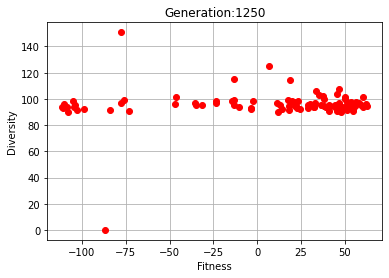

INFO:root:48 survived walker,max fitness: 62.70479895283104
Time: 122.99 sec
--- Generation 1251 ---
INFO:root:54 survived walker,max fitness: 62.70479895283104
Time: 9.11 sec
--- Generation 1252 ---
INFO:root:47 survived walker,max fitness: 62.70479895283104
Time: 7.45 sec
--- Generation 1253 ---
INFO:root:56 survived walker,max fitness: 62.70479895283104
Time: 8.53 sec
--- Generation 1254 ---
INFO:root:47 survived walker,max fitness: 62.70479895283104
Time: 7.83 sec
--- Generation 1255 ---
INFO:root:43 survived walker,max fitness: 62.70479895283104
Time: 8.63 sec
--- Generation 1256 ---
INFO:root:48 survived walker,max fitness: 62.70479895283104
Time: 9.64 sec
--- Generation 1257 ---
INFO:root:48 survived walker,max fitness: 62.70479895283104
Time: 8.96 sec
--- Generation 1258 ---
INFO:root:41 survived walker,max fitness: 62.70479895283104
Time: 8.89 sec
--- Generation 1259 ---
INFO:root:60 survived walker,max fitness: 62.70479895283104
Time: 9.66 sec
--- Generation 1260 ---
INFO:roo

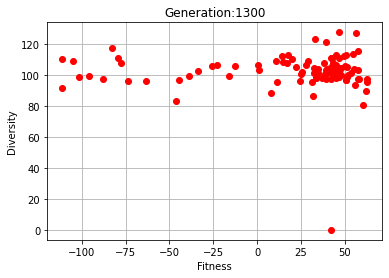

INFO:root:48 survived walker,max fitness: 62.70479895283104
Time: 126.95 sec
--- Generation 1301 ---
INFO:root:47 survived walker,max fitness: 62.70479895283104
Time: 9.76 sec
--- Generation 1302 ---
INFO:root:50 survived walker,max fitness: 62.70479895283104
Time: 8.83 sec
--- Generation 1303 ---
INFO:root:55 survived walker,max fitness: 62.70479895283104
Time: 7.95 sec
--- Generation 1304 ---
INFO:root:44 survived walker,max fitness: 62.70479895283104
Time: 7.09 sec
--- Generation 1305 ---
INFO:root:50 survived walker,max fitness: 62.70479895283104
Time: 9.42 sec
--- Generation 1306 ---
INFO:root:51 survived walker,max fitness: 62.70479895283104
Time: 9.37 sec
--- Generation 1307 ---
INFO:root:57 survived walker,max fitness: 62.70479895283104
Time: 8.38 sec
--- Generation 1308 ---
INFO:root:53 survived walker,max fitness: 62.70479895283104
Time: 7.83 sec
--- Generation 1309 ---
INFO:root:46 survived walker,max fitness: 62.70479895283104
Time: 8.34 sec
--- Generation 1310 ---
INFO:roo

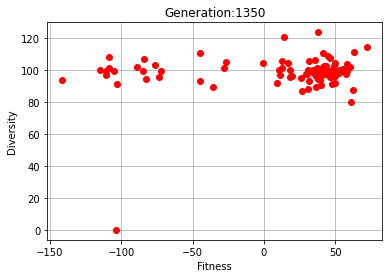

INFO:root:54 survived walker,max fitness: 71.914487514553
Time: 119.29 sec
--- Generation 1351 ---
INFO:root:52 survived walker,max fitness: 71.914487514553
Time: 8.00 sec
--- Generation 1352 ---
INFO:root:50 survived walker,max fitness: 71.914487514553
Time: 7.40 sec
--- Generation 1353 ---
INFO:root:55 survived walker,max fitness: 71.914487514553
Time: 7.55 sec
--- Generation 1354 ---
INFO:root:59 survived walker,max fitness: 71.914487514553
Time: 7.14 sec
--- Generation 1355 ---
INFO:root:47 survived walker,max fitness: 71.914487514553
Time: 6.29 sec
--- Generation 1356 ---
INFO:root:50 survived walker,max fitness: 71.914487514553
Time: 8.28 sec
--- Generation 1357 ---
INFO:root:51 survived walker,max fitness: 71.914487514553
Time: 7.64 sec
--- Generation 1358 ---
INFO:root:52 survived walker,max fitness: 71.914487514553
Time: 8.07 sec
--- Generation 1359 ---
INFO:root:49 survived walker,max fitness: 71.914487514553
Time: 8.36 sec
--- Generation 1360 ---
INFO:root:49 survived walker

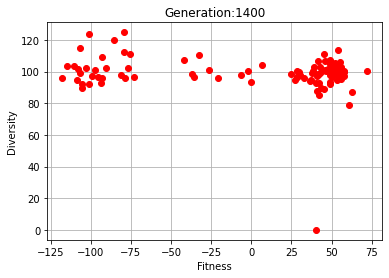

INFO:root:40 survived walker,max fitness: 71.914487514553
Time: 119.73 sec
--- Generation 1401 ---
INFO:root:49 survived walker,max fitness: 71.914487514553
Time: 9.60 sec
--- Generation 1402 ---
INFO:root:53 survived walker,max fitness: 71.914487514553
Time: 8.00 sec
--- Generation 1403 ---
INFO:root:50 survived walker,max fitness: 71.914487514553
Time: 7.49 sec
--- Generation 1404 ---
INFO:root:49 survived walker,max fitness: 71.914487514553
Time: 7.97 sec
--- Generation 1405 ---
INFO:root:47 survived walker,max fitness: 71.914487514553
Time: 8.21 sec
--- Generation 1406 ---
INFO:root:53 survived walker,max fitness: 71.914487514553
Time: 8.64 sec
--- Generation 1407 ---
INFO:root:59 survived walker,max fitness: 71.914487514553
Time: 7.57 sec
--- Generation 1408 ---
INFO:root:50 survived walker,max fitness: 71.914487514553
Time: 6.58 sec
--- Generation 1409 ---
INFO:root:44 survived walker,max fitness: 71.914487514553
Time: 8.58 sec
--- Generation 1410 ---
INFO:root:53 survived walker

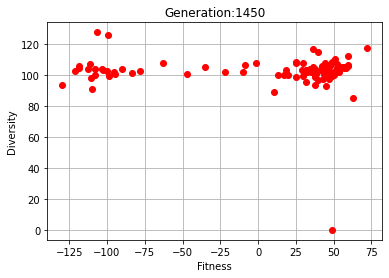

INFO:root:49 survived walker,max fitness: 71.914487514553
Time: 134.64 sec
--- Generation 1451 ---
INFO:root:59 survived walker,max fitness: 71.914487514553
Time: 9.18 sec
--- Generation 1452 ---
INFO:root:40 survived walker,max fitness: 71.914487514553
Time: 7.22 sec
--- Generation 1453 ---
INFO:root:54 survived walker,max fitness: 71.914487514553
Time: 9.84 sec
--- Generation 1454 ---
INFO:root:51 survived walker,max fitness: 71.914487514553
Time: 8.07 sec
--- Generation 1455 ---
INFO:root:55 survived walker,max fitness: 71.914487514553
Time: 9.18 sec
--- Generation 1456 ---
INFO:root:45 survived walker,max fitness: 71.914487514553
Time: 7.83 sec
--- Generation 1457 ---
INFO:root:52 survived walker,max fitness: 71.914487514553
Time: 8.91 sec
--- Generation 1458 ---
INFO:root:55 survived walker,max fitness: 71.914487514553
Time: 7.97 sec
--- Generation 1459 ---
INFO:root:53 survived walker,max fitness: 71.914487514553
Time: 6.89 sec
--- Generation 1460 ---
INFO:root:52 survived walker

<Figure size 432x288 with 0 Axes>

In [2]:
import gym
import time
from src.Entity import Entity
from src.EvolutionCtrl import Population_Manager
from src.TrainEval import TrainEval
import logging
from src.optional.Welford import Welford
#############
import copy
#############

logging.basicConfig(level=logging.INFO)

# 1) Environment
env = gym.make("BipedalWalker-v3")
print(f"Dim. action space: {env.action_space.shape}")
print(f"Dim. observation space: {env.observation_space.shape}")

# 2) Training Params
POP_SIZE = 100
MAX_SEQUENCE_LEN = 400
N_GENERATIONS = 10000
MUTATION_RATE = .1
PROB_NODE_COPY = .1
WEIGHT_INIT_INTERVAL = [-1, 1]
WELFORD = True
N_LAYER_NODES = [env.observation_space.shape[0],
                 48, 48, 32,
                 env.action_space.shape[0]]

# 3) Init population
init_population = [Entity(N_LAYER_NODES, WEIGHT_INIT_INTERVAL)
                   for i in range(POP_SIZE)]

pop_manager = Population_Manager(init_population, MUTATION_RATE,
                                 PROB_NODE_COPY)

train_evaluator = TrainEval()

# 4) Start training
if __name__ == '__main__':
    for generation in range(N_GENERATIONS):
        t_start = time.time()

        print(f"--- Generation {generation} ---")
        for entity in pop_manager.population:
            if not entity.survived:
                agent_env_loop(entity, generation)

        if generation % 50 == 0:
            train_evaluator.eval_training(pop_manager.population, generation)

        pop_manager.breed_new_population()

        print(f"Time: {(time.time() - t_start):.2f} sec")

# TODO: type checking, properties

In [3]:
pop_manager.population.sort(key=lambda x: x.fitness, reverse=True) 
agent = pop_manager.population[0]
agent.obs_norm#[0].std 

[<Welford: 0.4560686467326866 +- 0.33755992984583916>,
 <Welford: 0.0016167738320186237 +- 0.08595356021302451>,
 <Welford: 0.25016902966488297 +- 0.15057844076730267>,
 <Welford: -0.009168638131194928 +- 0.09101695930875862>,
 <Welford: -0.8009508486145767 +- 0.16232215755974413>,
 <Welford: -0.03811036254285711 +- 0.22927657976617638>,
 <Welford: -0.2806977145202126 +- 0.39812398587444775>,
 <Welford: -0.06018181776395439 +- 0.6908002491253309>,
 <Welford: 0.236201616056305 +- 0.4247509290428727>,
 <Welford: 0.9676649805732978 +- 0.2604147581649105>,
 <Welford: 0.04201800725210089 +- 0.5996747659902081>,
 <Welford: 0.11369998799648992 +- 0.6023694182250298>,
 <Welford: -0.0034055132634221046 +- 0.8251392836998324>,
 <Welford: 0.27766193144793216 +- 0.4478493616394998>,
 <Welford: 0.30054116660065644 +- 0.04209775977823674>,
 <Welford: 0.30385163831141776 +- 0.042623138688340986>,
 <Welford: 0.31437453023835155 +- 0.044168549285693706>,
 <Welford: 0.3333937865708044 +- 0.0469286073742

In [13]:
pop_manager.population.sort(key=lambda x: x.fitness, reverse=True) 
best_agent = pop_manager.population[20]
best_agent.fitness

50.36602173943922

In [14]:
env.seed(10) 
observation = env.reset()
for _ in range(MAX_SEQUENCE_LEN):
    env.render()
    action = best_agent.controller.feed_forward(observation)            # a_t, s_t            
    observation, reward, done, _ = env.step(action)                     # s_{t+1}, r_{t+1}, a_t       
env.close()

In [35]:
class testclass(object):
    def __init__(self):
        self.weights = [[1,2,3], [4,5,6]]

x = testclass()

In [36]:
y = x.weights[0]
y

[1, 2, 3]

In [37]:
y[0] = 7

In [38]:
x.weights[0]

[7, 2, 3]

In [39]:
y

[7, 2, 3]

In [34]:
a = [1,2,3]
b = a
b[0] = 4
a

[4, 2, 3]

In [5]:
import numpy as np
weights = np.random.uniform(-1.0, 1.0, (4, 3))
weights_2 = np.random.uniform(-1.0, 1.0, (4, 3))

In [21]:
from difflib import SequenceMatcher as SequMatch

rat = 0.0
for i in range(len(weights)):
    sm = SequMatch(None, weights[i].round(1), weights_2[i].round(1))
    rat += sm.ratio()
weights
weights_2
#rat

array([[-0.13601143,  0.97048332, -0.8253675 ],
       [ 0.72817677,  0.75721678,  0.75244338],
       [-0.26970826, -0.59656433,  0.79409955],
       [-0.86833561, -0.64606015, -0.6582288 ]])

In [10]:
np.random.uniform(low = -1.0, high = 1.0, size = 3)

array([0.96191887, 0.5971491 , 0.52781256])